In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

import os
import gc
import warnings

warnings.filterwarnings('ignore')

import glob
from PIL import Image

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('ggplot')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

%matplotlib inline

os.chdir("../../")
root_path = os.getcwd()

raw_file_path = os.path.join(root_path, "Bigcon2020_raw_file")
csv_file_path = os.path.join(root_path, "BigCon_2020/csv_files")
pickle_file_path = os.path.join(root_path, "BigCon_2020/pickle_files")

image_path = 'C:/Users/rears/OneDrive/바탕 화면/dacon_covid19/'

In [9]:
root_path

'C:\\Users\\rears'

In [2]:
raw_file_folders = os.listdir(raw_file_path)
geo_df=gpd.read_file(os.path.join(raw_file_path,raw_file_folders[0],'4개지역_행정동.SHP'))

In [62]:
result_dict.get(4).get('process')

,HDONG_NM,result_0,result_1,result_2,result_3
0,공릉1동,16876.758772,16876.758772,4042.755436,4042.755436
1,공릉2동,3651.973636,3651.973636,982.077698,982.077698
2,상계10동,13566.945343,13566.945343,5991.541512,5991.541512
3,상계1동,2967.340306,2967.340306,2867.381157,2867.381157
4,상계2동,11857.117779,11857.117779,5736.502929,5736.502929
5,상계3.4동,2362.786775,2362.786775,1741.836307,1741.836307
6,상계5동,6401.485276,6401.485276,4944.787303,4944.787303
7,상계6.7동,17952.297684,17952.297684,6045.465027,6045.465027
8,상계8동,4656.181810,4656.181810,3630.307464,3630.307464
9,상계9동,7276.291348,7276.291348,5631.242028,5631.242028


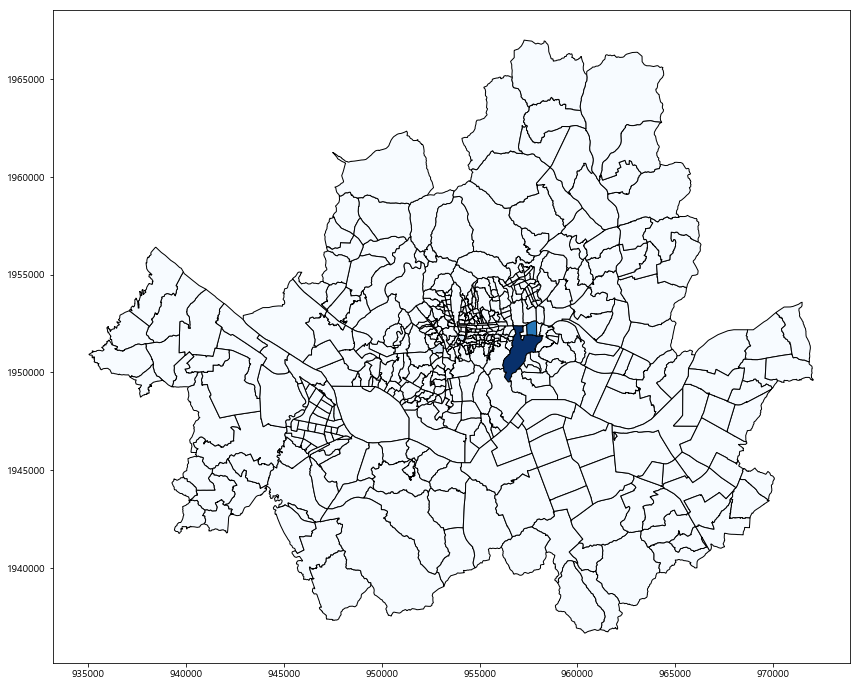

In [58]:
gpd.read_file(os.path.join(root_path,'EMD_202005','EMD.shp'), encoding='cp949').head(467).rename(columns={'EMD_KOR_NM':'HDONG_NM'}).merge(result_dict.get(4).get('process'), how='left').fillna(0).plot(column='result_2',figsize=(20,12), edgecolor='black',cmap='Blues')

In [3]:
geo_df['X_COORD'] = geo_df['X_COORD'].astype(float)
geo_df['Y_COORD'] = geo_df['Y_COORD'].astype(float)

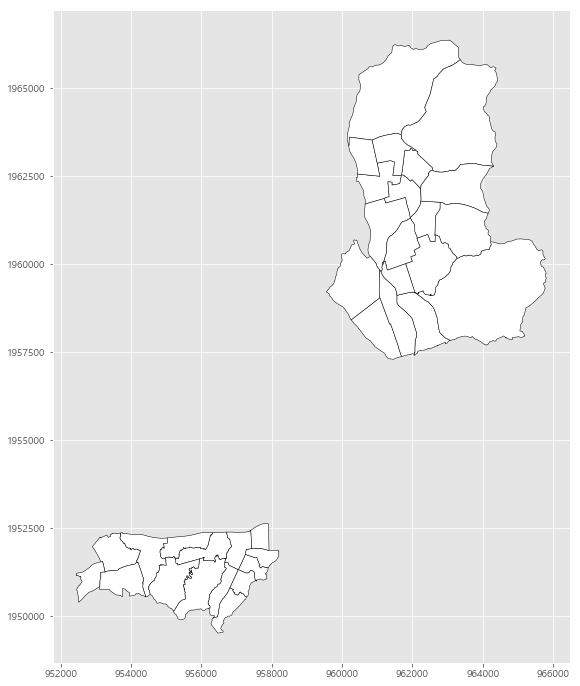

In [43]:
geo_df.loc[geo_df.SIDO_CD=='11'].plot(figsize=(12,12), color='white', edgecolor='k')

In [4]:
folder_path = os.path.join(raw_file_path, raw_file_folders[0])

file_names = [file_name for file_name in os.listdir(folder_path) if file_name.split(sep='.')[-1]=='CSV']

df_list = []

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path, sep='|')
    df_list.append(df)

In [5]:
flow_age = pd.concat(df_list[:8]).reset_index(drop=True)
flow_time = pd.concat(df_list[8:]).reset_index(drop=True)

melted_flow_age = flow_age.melt(id_vars=['STD_YM','STD_YMD','HDONG_CD','HDONG_NM'], var_name='age', value_name='flow_counts').\
        sort_values(by=['HDONG_CD','STD_YMD','age']).\
        reset_index(drop=True)

melted_flow_time = flow_time.melt(id_vars=['STD_YM','STD_YMD','HDONG_CD','HDONG_NM'], var_name='time', value_name='flow_counts').\
        sort_values(by=['HDONG_CD','STD_YMD','time']).\
        reset_index(drop=True)

melted_flow_age['STD_YMD'] = pd.to_datetime(melted_flow_age.STD_YMD, format='%Y%m%d')
melted_flow_time['STD_YMD'] = pd.to_datetime(melted_flow_time.STD_YMD, format='%Y%m%d')

melted_flow_age['year'] = melted_flow_age.STD_YMD.dt.year.values
melted_flow_age['month'] = melted_flow_age.STD_YMD.dt.month.values
melted_flow_age['weekofyear'] = melted_flow_age.STD_YMD.dt.weekofyear.values
melted_flow_age['dayofweek'] = melted_flow_age.STD_YMD.dt.dayofweek.values
melted_flow_age['weekday'] = np.where(melted_flow_age.dayofweek<5,"평일",'주말')

melted_flow_time['year'] = melted_flow_time.STD_YMD.dt.year.values
melted_flow_time['month'] = melted_flow_time.STD_YMD.dt.month.values
melted_flow_time['weekofyear'] = melted_flow_time.STD_YMD.dt.weekofyear.values
melted_flow_time['dayofweek'] = melted_flow_time.STD_YMD.dt.dayofweek.values
melted_flow_time['weekday'] = np.where(melted_flow_time.dayofweek<5,"평일",'주말')

In [6]:
local_people_data = pd.read_csv(os.path.join(csv_file_path, 'local_people_data.csv'))

In [7]:
local_people_data['HDONG_NM'] = local_people_data.G_DNG_NM.apply(lambda x : x.split(' ')[-1])
local_people_data['GU_NM'] = local_people_data.G_DNG_NM.apply(lambda x : x.split(' ')[1])

local_people_data['STD_DD'] = pd.to_datetime(local_people_data['STD_DD'], format='%Y-%m-%d')

local_people_data['year'] = local_people_data.STD_DD.dt.year.values
local_people_data['month'] = local_people_data.STD_DD.dt.month.values
local_people_data['weekofyear'] = local_people_data.STD_DD.dt.weekofyear.values
local_people_data['dayofweek'] = local_people_data.STD_DD.dt.dayofweek.values

In [8]:
geo_df

,STD_YYYY,HDONG_CD,HDONG_NM,SIDO_CD,SIDO_NM,SGNG_CD,SGNG_NM,AREA,LENGTH,X_COORD,Y_COORD,geometry
0,2020,2726067000,고산1동,27,대구광역시,27260,수성구,8881312.38,17757.54,128.699631,35.811747,"POLYGON ((1110163.050 1760631.159, 1110159.980..."
1,2020,2726068000,고산2동,27,대구광역시,27260,수성구,24523329.28,25763.81,128.677147,35.838758,"POLYGON ((1108750.463 1760472.331, 1108750.254..."
2,2020,2726069000,고산3동,27,대구광역시,27260,수성구,5315712.45,11274.68,128.714044,35.849048,"POLYGON ((1110796.393 1761790.272, 1110768.063..."
3,2020,2726064000,두산동,27,대구광역시,27260,수성구,1966650.15,7777.10,128.620833,35.828566,"POLYGON ((1101901.259 1759682.396, 1101895.505..."
4,2020,2726055000,만촌1동,27,대구광역시,27260,수성구,2830625.94,8778.85,128.649513,35.870682,"POLYGON ((1104959.292 1764030.763, 1104950.336..."
...,...,...,...,...,...,...,...,...,...,...,...,...
64,2020,1114068000,중림동,11,서울특별시,11140,중구,482329.92,3500.86,126.966042,37.557356,"POLYGON ((953267.837 1951244.338, 953260.413 1..."
65,2020,1114064500,청구동,11,서울특별시,11140,중구,336949.37,2696.70,127.015201,37.556863,"POLYGON ((957542.926 1950997.368, 957519.101 1..."
66,2020,1114057000,필동,11,서울특별시,11140,중구,1173378.79,6575.62,126.992277,37.556817,"POLYGON ((955947.962 1951617.335, 955934.934 1..."
67,2020,1114067000,황학동,11,서울특별시,11140,중구,328678.23,2381.97,127.020846,37.568536,"POLYGON ((957926.315 1951862.361, 957912.004 1..."


In [147]:
mean_fp_by_dong = melted_flow_time.groupby(['STD_YMD','time','HDONG_NM']).flow_counts.sum().reset_index().groupby(['HDONG_NM','time']).flow_counts.mean().reset_index()

In [182]:
mean_fp_by_dong.head()

,HDONG_NM,time,flow_counts
0,고산1동,TMST_00,2000.352656
1,고산1동,TMST_01,1457.748838
2,고산1동,TMST_02,1116.313237
3,고산1동,TMST_03,905.212324
4,고산1동,TMST_04,845.152365


In [25]:
geo_df['center'] = geo_df.geometry.centroid

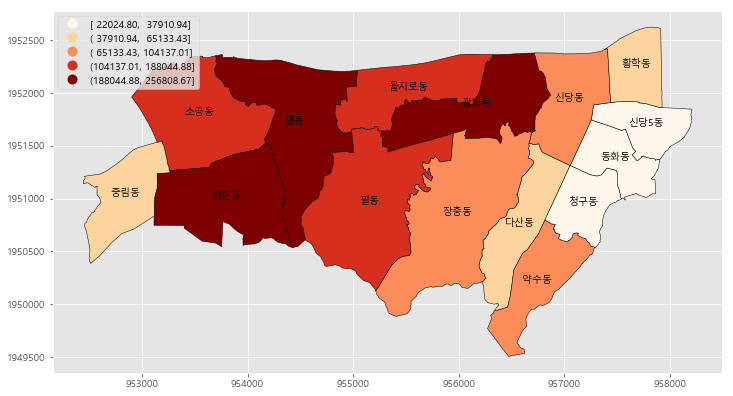

In [39]:
fig, ax = plt.subplots(figsize=(12,12))

geo_df.merge(mean_fp_by_dong).query('SGNG_CD==\'11140\'').plot(column='flow_counts',cmap='OrRd', edgecolor='black', legend=True, legend_kwds={'loc' : 'upper left'}, scheme='quantiles', ax=ax)

for idx, row in geo_df.query('SGNG_CD==\'11140\'').iterrows():
    ax.annotate(row['HDONG_NM'], (row['center'].x,row['center'].y), fontsize=10, ha='center')



In [137]:
# geo_df.loc[geo_df.SGNG_CD=='11140'].merge(local_people_data.loc[local_people_data.시간대구분==i].groupby(['HDONG_NM'])['총생활인구수'].sum().reset_index())

In [185]:
def make_gif_with_GU(df,merged_df,time_col,col,SGNG_CD, duration=500):
    gif_folder = os.path.join(image_path,'gif',f'{col}_{SGNG_CD}')
    if not os.path.exists(gif_folder):
        os.mkdir(gif_folder)

    for i in merged_df[time_col].unique():
        plt.ioff()
        fig, ax = plt.subplots(figsize=(12,12))
        df.loc[df.SGNG_CD==SGNG_CD].\
            merge(merged_df.loc[merged_df[time_col]==i].groupby(['HDONG_NM'])[col].sum().reset_index()).\
            plot(
                    column=col, cmap='OrRd', edgecolor='black', legend=True, legend_kwds={'loc' : 'upper left'},
                    scheme='quantiles', ax=ax
                )

        for idx, row in df.loc[df.SGNG_CD==SGNG_CD].iterrows():
            ax.annotate(row['HDONG_NM'], (row['center'].x,row['center'].y), fontsize=10, ha='center')

        file_path = os.path.join(gif_folder, f'floating_pop_{SGNG_CD}_{i}.png')

        ax.set_title(f'{i}시')
        ax.legend('lower right')
        fig.savefig(file_path)
        plt.close(fig)
    
    try:
        img, *imgs = [Image.open(os.path.join(gif_folder,f)) for f in sorted(os.listdir(gif_folder), key=lambda x:int(str(x).split('_')[3].split('.')[0]))]
    except ValueError:
        #print([f for f in sorted(os.listdir(gif_folder))])
        img, *imgs = [Image.open(os.path.join(gif_folder,f)) for f in sorted(os.listdir(gif_folder), key=lambda x:int(str(x).split('_')[4].split('.')[0]))]
    gif_file = os.path.join(image_path,f'floating_pop_time_{SGNG_CD}_{col}.gif')
    
    img.save(fp=gif_file, format='GIF', append_images=imgs,
         save_all=True, duration=duration, loop=0)

In [141]:
make_gif_with_GU(geo_df,local_people_data,'시간대구분','총생활인구수','11140')

In [184]:
for cd in tqdm(geo_df.SGNG_CD.unique()):
    make_gif_with_GU(geo_df,mean_fp_by_dong, 'time', 'flow_counts', cd)

In [187]:
melted_flow_time.loc[melted_flow_time.time=='TMST_00'].groupby(['HDONG_NM']).flow_counts.mean().reset_index()

,HDONG_NM,flow_counts
0,고산1동,2000.352656
1,고산2동,2746.932656
2,고산3동,922.962988
3,공릉1동,2948.688050
4,공릉2동,2775.477012
...,...,...
64,하계2동,1148.199917
65,황금1동,874.958133
66,황금2동,1242.729295
67,황학동,625.929419


In [203]:
def make_gif_with_SI(df,merged_df,time_col,col,SIDO_CD, duration=500):
    gif_folder = os.path.join(image_path,'gif',f'{col}_{SIDO_CD}')
    if not os.path.exists(gif_folder):
        os.mkdir(gif_folder)

    for i in merged_df[time_col].unique():
        plt.ioff()
        fig, ax = plt.subplots(figsize=(16,18))
        df.loc[df.SIDO_CD==SIDO_CD].\
            merge(merged_df.loc[merged_df[time_col]==i].groupby(['HDONG_NM'])[col].sum().reset_index()).\
            plot(
                    column=col, cmap='Blues', edgecolor='black', legend=True, legend_kwds={'loc' : 'upper left'},
                    scheme='quantiles', ax=ax
                )

        for idx, row in df.loc[df.SIDO_CD==SIDO_CD].iterrows():
            ax.annotate(row['HDONG_NM'], (row['center'].x,row['center'].y), fontsize=10, ha='center')

        file_path = os.path.join(gif_folder, f'floating_pop_{SIDO_CD}_{i}.png')

        ax.set_title(f'{i}시')
        ax.legend('lower right')
        fig.savefig(file_path)
        plt.close(fig)
    
    
    img, *imgs = [Image.open(os.path.join(gif_folder,f)) for f in sorted(os.listdir(gif_folder), key=lambda x:int(str(x).split('_')[4].split('.')[0]))]
    
    gif_file = os.path.join(image_path,f'floating_pop_time_{SIDO_CD}_{col}.gif')
    
    img.save(fp=gif_file, format='GIF', append_images=imgs,
         save_all=True, duration=duration, loop=0)

In [201]:
from tqdm import tqdm

In [204]:
for cd in tqdm(geo_df.SIDO_CD.unique()):
    make_gif_with_SI(geo_df,mean_fp_by_dong, 'time', 'flow_counts', cd)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:12<00:00,  6.45s/it]


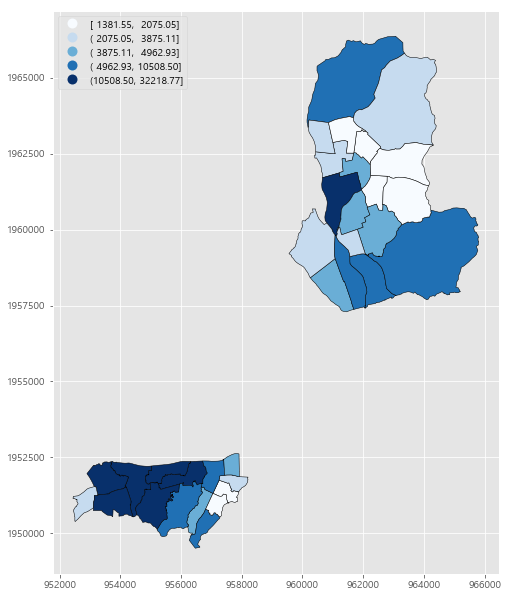

In [197]:
geo_df.loc[geo_df.SIDO_CD=='11'].\
        merge(melted_flow_time.loc[melted_flow_time.time=='TMST_08'].\
                              groupby(['HDONG_NM']).flow_counts.mean().\
                              reset_index()
             ).\
    plot(
            figsize=(8,12), column='flow_counts', edgecolor='k', cmap='Blues',
            legend=True, legend_kwds={'loc':'upper left'}, scheme='quantiles'
    )

In [206]:
geo_df

,STD_YYYY,HDONG_CD,HDONG_NM,SIDO_CD,SIDO_NM,SGNG_CD,SGNG_NM,AREA,LENGTH,X_COORD,Y_COORD,geometry,center
0,2020,2726067000,고산1동,27,대구광역시,27260,수성구,8881312.38,17757.54,128.699631,35.811747,"POLYGON ((1110163.050 1760631.159, 1110159.980...",POINT (1108378.584 1757917.496)
1,2020,2726068000,고산2동,27,대구광역시,27260,수성구,24523329.28,25763.81,128.677147,35.838758,"POLYGON ((1108750.463 1760472.331, 1108750.254...",POINT (1106311.447 1760888.832)
2,2020,2726069000,고산3동,27,대구광역시,27260,수성구,5315712.45,11274.68,128.714044,35.849048,"POLYGON ((1110796.393 1761790.272, 1110768.063...",POINT (1109629.645 1762071.098)
3,2020,2726064000,두산동,27,대구광역시,27260,수성구,1966650.15,7777.10,128.620833,35.828566,"POLYGON ((1101901.259 1759682.396, 1101895.505...",POINT (1101238.235 1759698.768)
4,2020,2726055000,만촌1동,27,대구광역시,27260,수성구,2830625.94,8778.85,128.649513,35.870682,"POLYGON ((1104959.292 1764030.763, 1104950.336...",POINT (1103773.981 1764400.357)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2020,1114068000,중림동,11,서울특별시,11140,중구,482329.92,3500.86,126.966042,37.557356,"POLYGON ((953267.837 1951244.338, 953260.413 1...",POINT (952839.355 1951023.475)
65,2020,1114064500,청구동,11,서울특별시,11140,중구,336949.37,2696.70,127.015201,37.556863,"POLYGON ((957542.926 1950997.368, 957519.101 1...",POINT (957180.979 1950945.326)
66,2020,1114057000,필동,11,서울특별시,11140,중구,1173378.79,6575.62,126.992277,37.556817,"POLYGON ((955947.962 1951617.335, 955934.934 1...",POINT (955156.170 1950950.928)
67,2020,1114067000,황학동,11,서울특별시,11140,중구,328678.23,2381.97,127.020846,37.568536,"POLYGON ((957926.315 1951862.361, 957912.004 1...",POINT (957686.173 1952237.802)


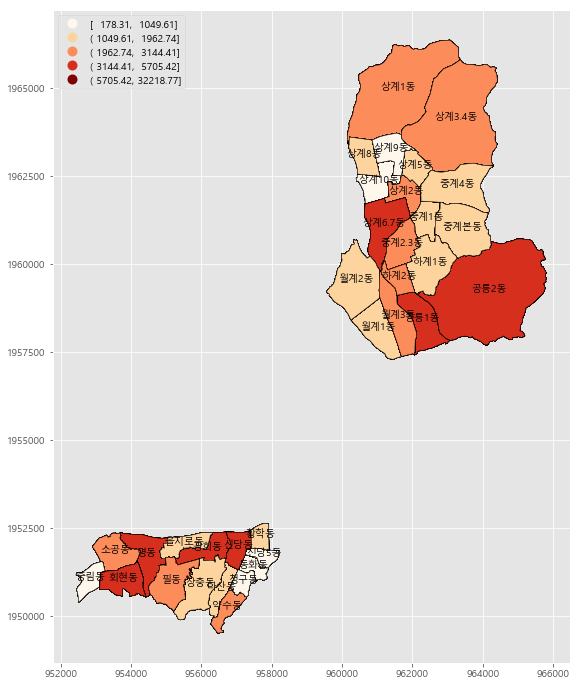

In [212]:
fig, ax = plt.subplots(figsize=(12,12))

geo_df.merge(mean_fp_by_dong).query('SIDO_CD==\'11\'').plot(column='flow_counts',cmap='OrRd', edgecolor='black', legend=True, legend_kwds={'loc' : 'upper left'}, scheme='quantiles', ax=ax)

for idx, row in geo_df.query('SIDO_CD==\'11\'').iterrows():
    ax.annotate(row['HDONG_NM'], (row['center'].x,row['center'].y), fontsize=10, ha='center')

In [214]:
import pickle

In [215]:
card_files = [file for file in os.listdir(csv_file_path) if file.startswith('카드')]

df_list = []

for file_name in card_files:
    file_path = os.path.join(csv_file_path, file_name)
    df = pd.read_csv(file_path)
    df_list.append(df)

foreigner = df_list[1]
register = df_list[0]

register = register.drop(register.columns[0], axis=1)
foreigner = foreigner.drop(foreigner.columns[0], axis=1)

with open(os.path.join(pickle_file_path,'card_code_to_name_dict.pickle'), 'rb') as f:
    card_code_to_dong_dict = pickle.load(f)

cat_dict = {10 : '숙박',
20 : '레저용품',
21 : '레저업소',
22 : '문화취미',
30 : '가구',
31 : '전기',
32 : '주방용구',
33 : '연료판매',
34 : '광학제품',
35 : '가전',
40 : '유통업',
42 : '의복',
43 : '직물',
44 : '신변잡화',
50 : '서적문구',
52 : '사무통신',
60 : '자동차판매',
62 : '자동차 정비',
70 : '의료기관',
71 : '보건위생',
80 : '요식업소',
81 : '음료식품',
92 : '수리서비스'}

register['region_code'] = register.GU_CD.astype(str)+register.DONG_CD.astype(str)
register['GU_NM'] = register.region_code.map(card_code_to_dong_dict.get('구명'))
register['HDONG_NM'] = register.region_code.map(card_code_to_dong_dict.get('행정동명'))

register = register.drop('region_code', axis=1)

register['MCT_CAT_NM'] = register.MCT_CAT_CD.map(cat_dict)

register['STD_DD'] = pd.to_datetime(register['STD_DD'], format='%Y%m%d')

register['year'] = register['STD_DD'].dt.year.values
register['month'] = register['STD_DD'].dt.month.values
register['weekofyear'] = register['STD_DD'].dt.weekofyear.values
register['dayofweek'] = register['STD_DD'].dt.dayofweek.values

register['weekday'] = np.where(register.dayofweek<5,'평일','주말')

In [222]:
register.groupby(['HDONG_NM','STD_DD'])['USE_CNT'].sum().reset_index().groupby(['HDONG_NM'])['USE_CNT'].mean().reset_index()

,HDONG_NM,USE_CNT
0,고산1동,12538.896266
1,고산2동,10085.248963
2,고산3동,10239.058091
3,공릉1동,26364.327801
4,공릉2동,25391.556017
...,...,...
64,하계2동,4657.522822
65,황금1동,2847.626556
66,황금2동,5988.365145
67,황학동,11421.941909


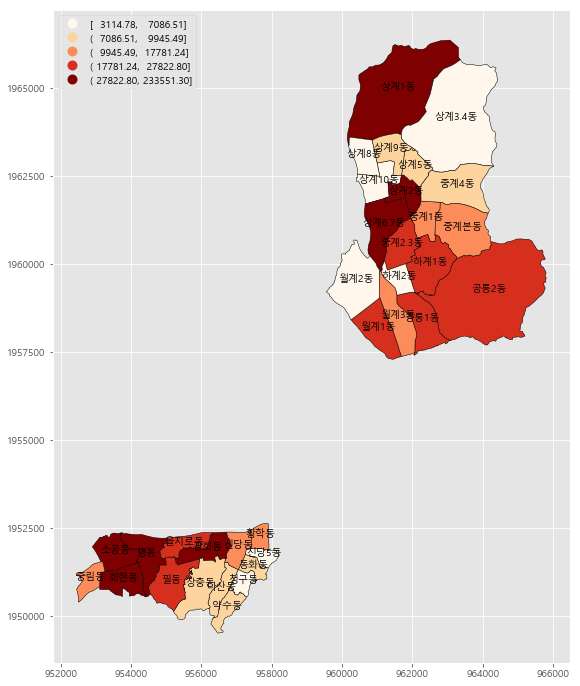

In [223]:
fig, ax = plt.subplots(figsize=(12,12))

geo_df.merge(register.groupby(['HDONG_NM','STD_DD'])['USE_CNT'].sum().reset_index().groupby(['HDONG_NM'])['USE_CNT'].mean().reset_index()).query('SIDO_CD==\'11\'').plot(column='USE_CNT',cmap='OrRd', edgecolor='black', legend=True, legend_kwds={'loc' : 'upper left'}, scheme='quantiles', ax=ax)

for idx, row in geo_df.query('SIDO_CD==\'11\'').iterrows():
    ax.annotate(row['HDONG_NM'], (row['center'].x,row['center'].y), fontsize=10, ha='center')

In [25]:
# pd.read_csv(os.path.join(csv_file_path, 'bunjang_seoul_v2.csv'))

In [6]:
geo_df_seoul = geo_df.loc[geo_df.SIDO_NM=='서울특별시'].reset_index()

In [4]:
import pickle

In [5]:
with open(os.path.join(pickle_file_path, 'result_dict.pickle'), 'rb') as f:
    result_dict = pickle.load(f)

In [30]:
result_dict.get(4).get('process').set_index('HDONG_NM').result_0.idxmax()

'명동'

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [74]:
# result_dict.get(4).get('process').to_csv("result.csv", index=False, encoding='cp949')

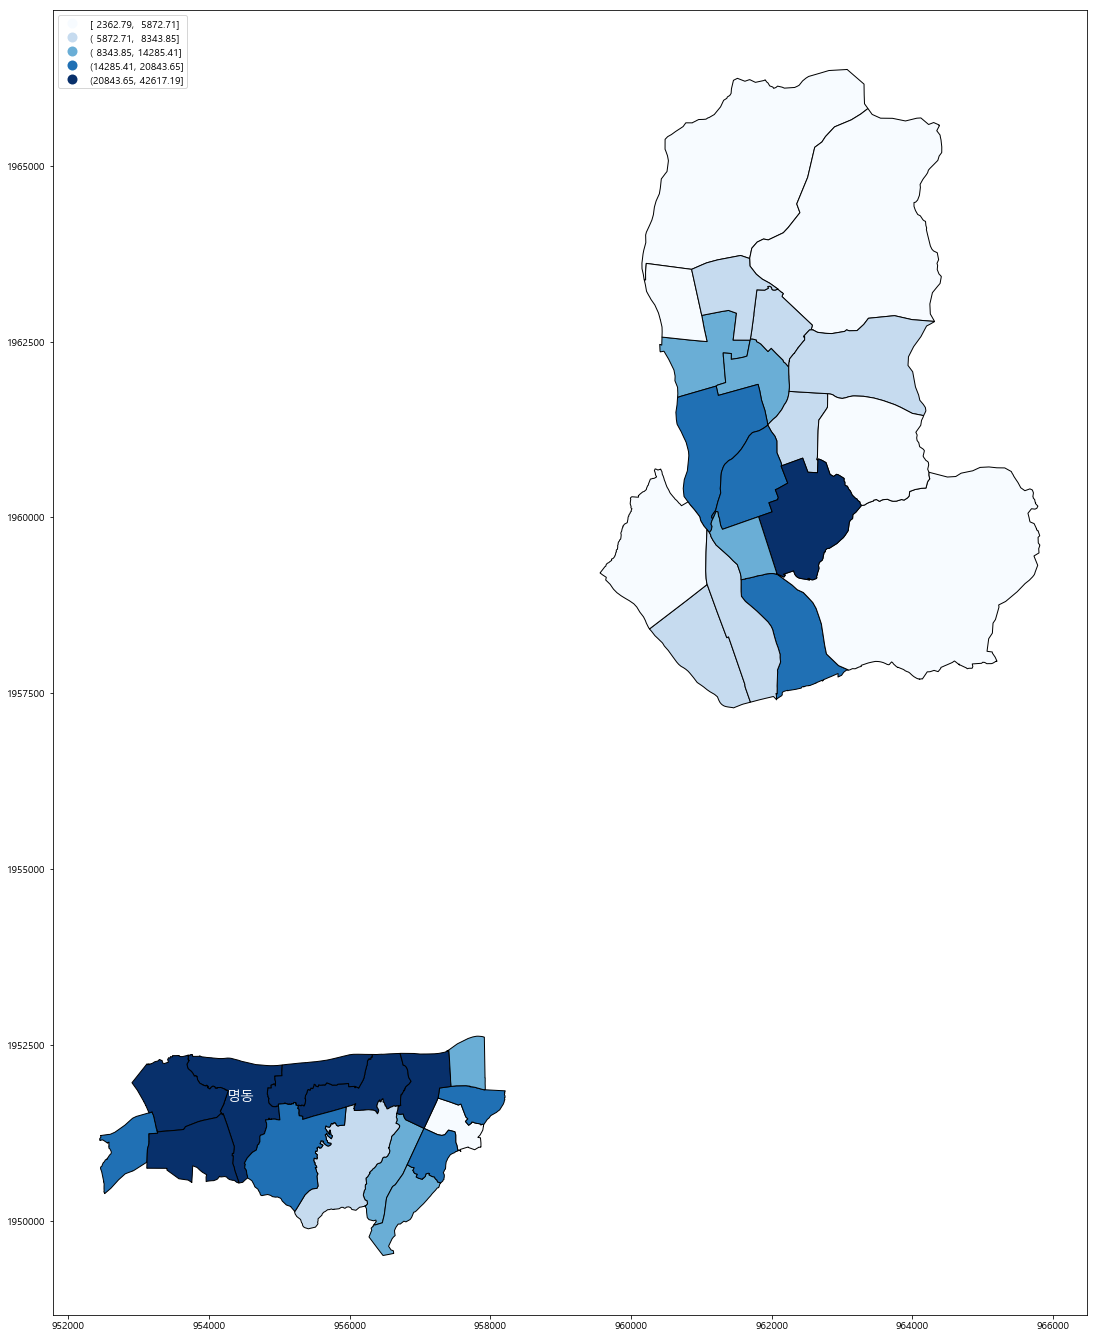

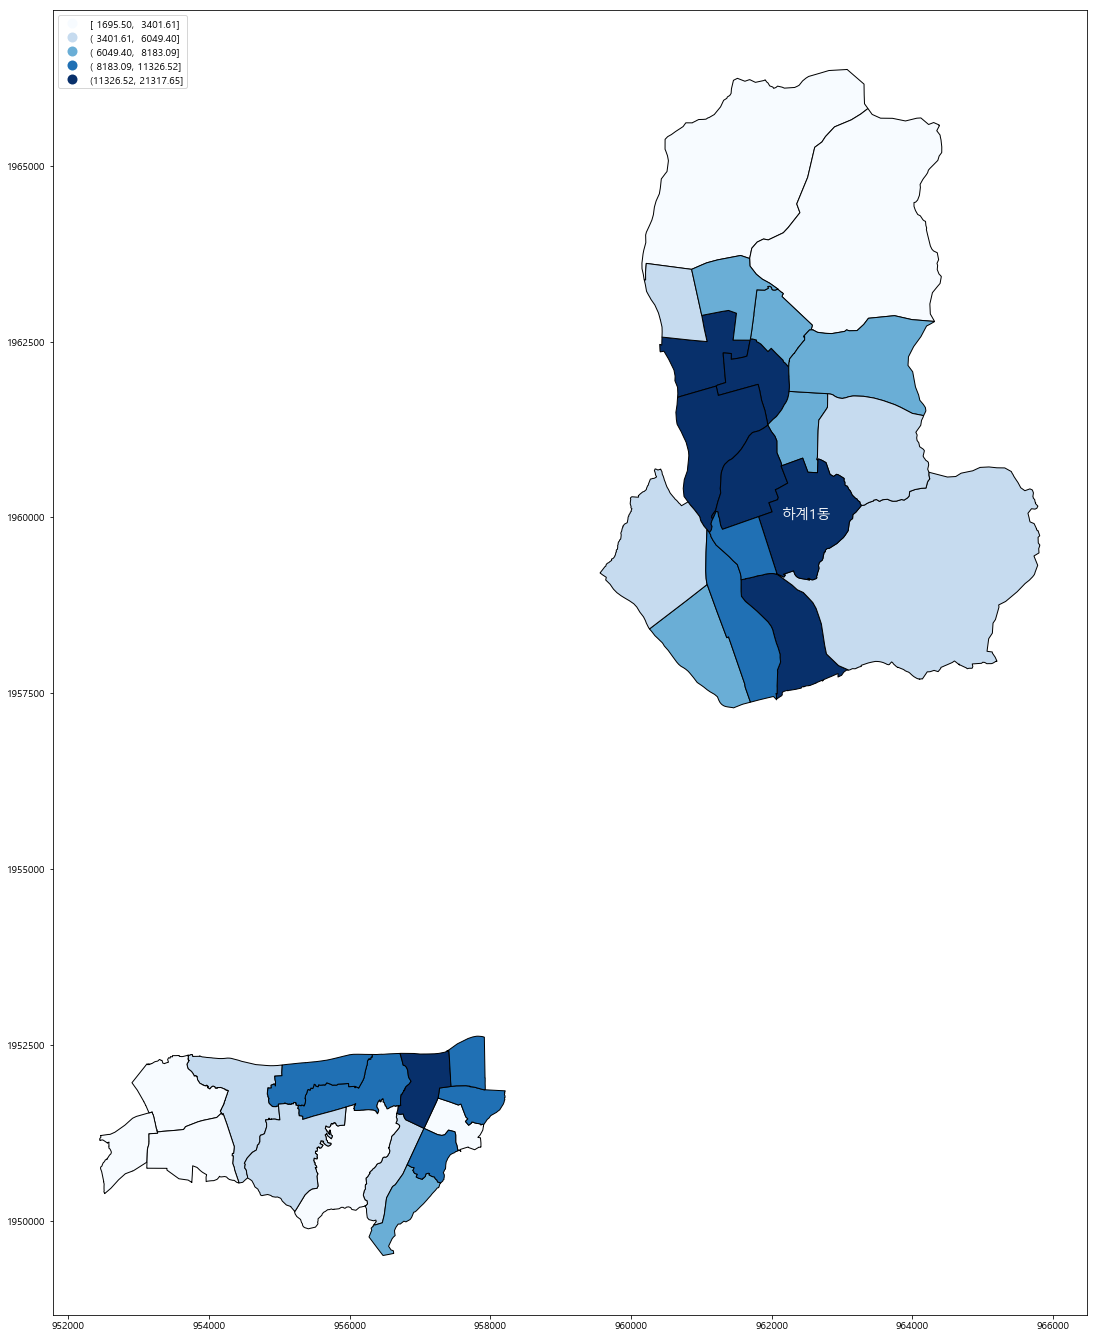

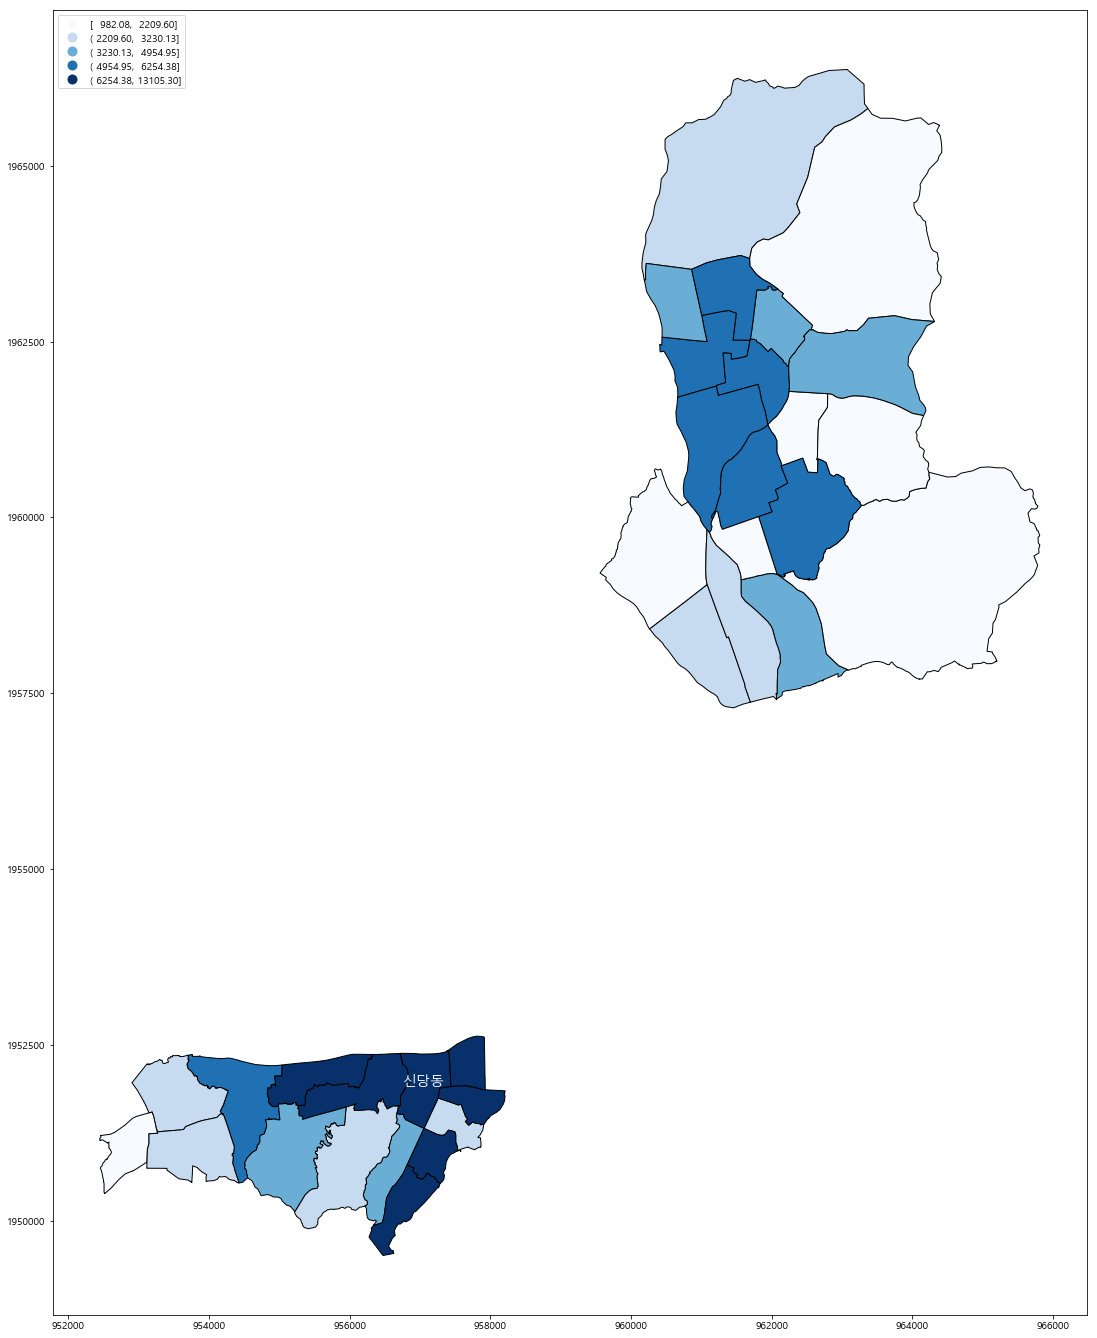

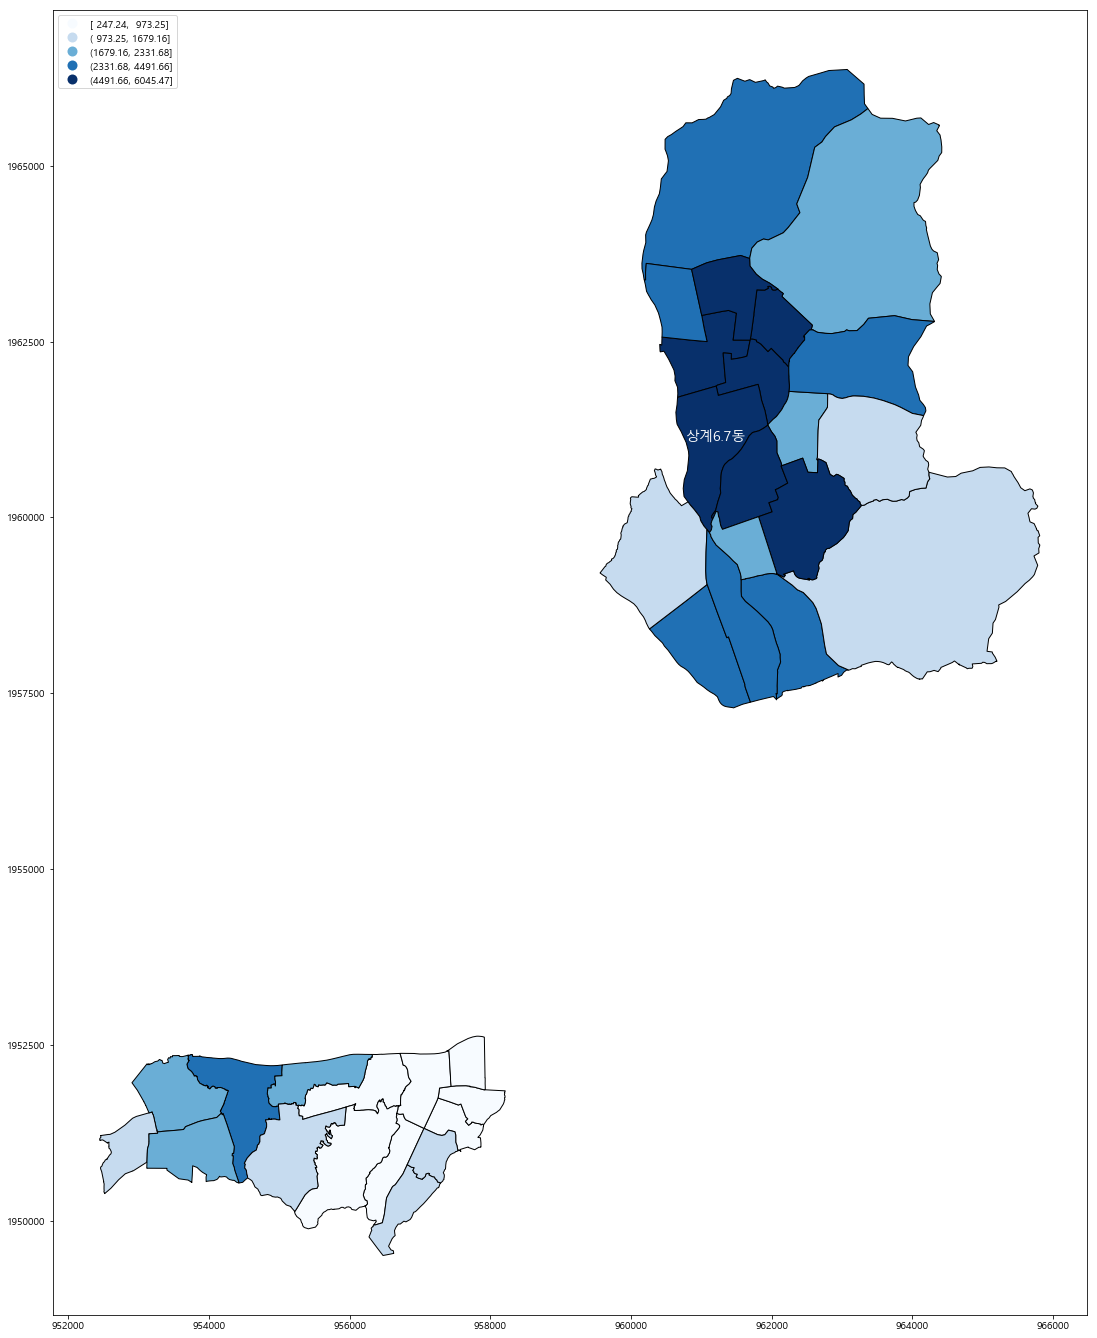

In [8]:
for i in range(4):
    fig, ax = plt.subplots(figsize=(36,24))
    geo_df_seoul.merge(result_dict.get(4).get('process')).plot(column=f'result_{i}', cmap='Blues',edgecolor='black', legend=True, legend_kwds={'loc' : 'upper left'}, scheme='quantiles', ax = ax)

    hdong = result_dict.get(4).get('process').set_index('HDONG_NM')[f'result_{i}'].idxmax()

    ax.annotate(f'{hdong}', (geo_df_seoul.loc[geo_df_seoul.HDONG_NM==hdong].geometry.centroid.x,geo_df_seoul.loc[geo_df_seoul.HDONG_NM==hdong].geometry.centroid.y), ha='center', fontsize=14, color='white')
    fig.savefig(os.path.join(image_path,f'result_{i}.png'))
    plt.show()

Text(22    954447.377964
dtype: float64, 22    1.951706e+06
dtype: float64, '명동')

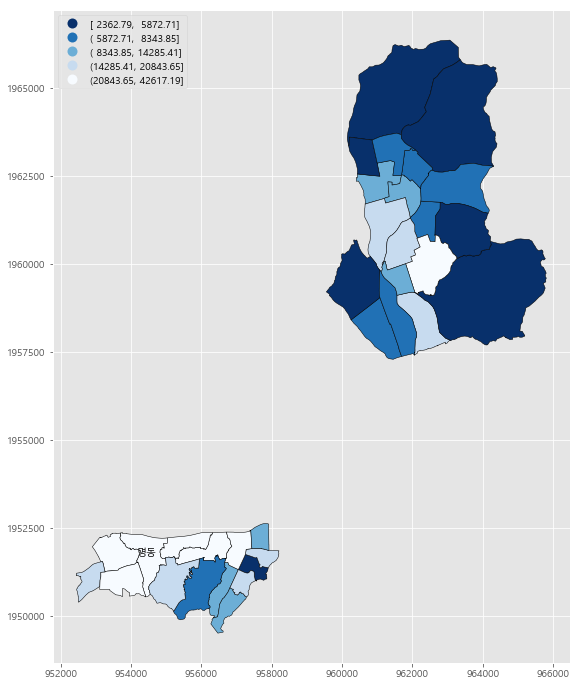

In [38]:
fig, ax = plt.subplots(figsize=(16,12))
geo_df_seoul.merge(result_dict.get(4).get('process')).plot(column='result_0', cmap='Blues_r',edgecolor='black', legend=True, legend_kwds={'loc' : 'upper left'}, scheme='quantiles', ax = ax)

hdong = result_dict.get(4).get('process').set_index('HDONG_NM')['result_0'].idxmax()

ax.annotate(f'{hdong}', (geo_df_seoul.loc[geo_df_seoul.HDONG_NM==hdong].geometry.centroid.x,geo_df_seoul.loc[geo_df_seoul.HDONG_NM==hdong].geometry.centroid.y), ha='center')

In [15]:
for n in [4,5]:
    result = result_dict.get(n).get('result')
    process = result_dict.get(n).get('process')
    

{'process':    HDONG_NM      result_0      result_1      result_2     result_3
 0      공릉1동  16876.758772  16876.758772   4042.755436  4042.755436
 1      공릉2동   3651.973636   3651.973636    982.077698   982.077698
 2     상계10동  13566.945343  13566.945343   5991.541512  5991.541512
 3      상계1동   2967.340306   2967.340306   2867.381157  2867.381157
 4      상계2동  11857.117779  11857.117779   5736.502929  5736.502929
 5    상계3.4동   2362.786775   2362.786775   1741.836307  1741.836307
 6      상계5동   6401.485276   6401.485276   4944.787303  4944.787303
 7    상계6.7동  17952.297684  17952.297684   6045.465027  6045.465027
 8      상계8동   4656.181810   4656.181810   3630.307464  3630.307464
 9      상계9동   7276.291348   7276.291348   5631.242028  5631.242028
 10     월계1동   7393.982177   7393.982177   3110.347010  3110.347010
 11     월계2동   3933.803643   3933.803643   1472.120481  1472.120481
 12     월계3동   8333.815497   8333.815497   2585.122059  2585.122059
 13     중계1동   7580.199431   7580.199

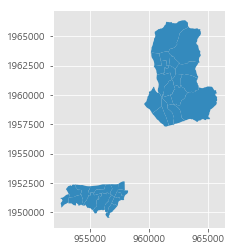

In [11]:
geo_df_seoul.plot()

### 행정동별 인구밀도

In [17]:
day_pop_by_HDONG=local_people_data.query('시간대구분 >= 9 & 시간대구분 <= 21').groupby(['STD_DD','HDONG_NM'])['총생활인구수'].mean().reset_index().groupby('HDONG_NM')['총생활인구수'].mean().reset_index()

In [22]:
pop_density=geo_df.merge(day_pop_by_HDONG).eval('인구밀도=총생활인구수/AREA*100')[['HDONG_NM','인구밀도']]

In [24]:
# pop_density.to_csv('pop_density.csv', index=False, encoding='utf-8')